## Лабораторна робота №2: "Імплементація алгоритмів стиснення"

Склад команди та розподіл виконаних завдань:

-
-

Для кожного з алгоритмів поданих нижче
- опишіть як працює алгорит
- напишіть класи з методами encode та decode
- перевірте правильність кодування та декодування
- дослідіть час виконання коду в залежності від розмірів вхідних даних
- оцініть ступінь стиснення(у відсотка) в залежності від розмірів
- напишіть висновок про ефективність різних алгоритмів та умови за яких той чи інший алгоритм дають кращий результат

# Алгоритм Гаффмана

В цьому алгоритмі доцільно імплементувати клас node та додаткові функції в Huffman для побудови дерева кодування

In [ ]:
class Huffman:
    def encode(self, text: str) -> tuple[str, dict[str, str]]:
        pass

    def decode(self, code: str, coding_dict: dict[str, str]):
        pass

# Алгоритм LZW

In [ ]:
class LZW:
    def encode(self, text: str) -> tuple[str, list]:
        pass

    def decode(self, code: str, coding_dict: list) -> str:
        pass

# Алгоритм LZ77

Потрібно заміряти розміри саме тексту, проте для роботи доцільно використовувати список тюплів, тому для зручності варто імплементувати додаткові алгоритми _text2list та _list2text

In [158]:
class LZ77:
    def __init__(self, buffer_size: int):
        self.buffer_size = buffer_size
    
    def encode(self, text: str) -> str:
        encoded = []
        window = 0

        while window < len(text):
            best_offset = -1
            best_length = -1
            best_match = ''

            for length in range(1, min(len(text) - window, self.buffer_size)):
                substring = text[window:window + length]
                offset = text.rfind(substring, max(0, window - self.buffer_size), window)

                if offset != -1 and length > best_length:
                    best_offset = window - offset
                    best_length = length
                    best_match = substring

            if best_match:
                encoded.append((best_offset, best_length, text[window + best_length]))
                window += best_length + 1
            else:
                encoded.append((0, 0, text[window]))
                window += 1
        return encoded
    def decode(self, code: str) -> str:
        decompressed = ''
        window = 0

        while window < len(code):
            offset, length, char = code[window]

            if offset == 0:
                decompressed += char
                window += 1
            else:
                start = len(decompressed) - offset
                for i in range(length):
                    decompressed += decompressed[start + i]
                decompressed += char
                window += 1
        return decompressed

In [162]:
lorem_ipsum_lines = []
with open("huge_test.txt") as f:
    for line in f:
        if line.strip() == "":
            continue
        lorem_ipsum_lines.append(line.strip())

encoded = []
decoded = []
lz77 = LZ77(5)
for line in lorem_ipsum_lines:
    encoded.append(lz77.encode(line))
    decoded.append(lz77.decode(encoded[-1]))
print(encoded)
print(decoded)
print(decoded == lorem_ipsum_lines)


[[(0, 0, 'L'), (0, 0, 'o'), (0, 0, 'r'), (0, 0, 'e'), (0, 0, 'm'), (0, 0, ' '), (0, 0, 'i'), (0, 0, 'p'), (0, 0, 's'), (0, 0, 'u'), (0, 0, 'm'), (0, 0, ' '), (0, 0, 'd'), (0, 0, 'o'), (0, 0, 'l'), (2, 1, 'r'), (0, 0, ' '), (0, 0, 's'), (0, 0, 'i'), (0, 0, 't'), (4, 1, 'a'), (0, 0, 'm'), (0, 0, 'e'), (5, 1, ','), (0, 0, ' '), (0, 0, 'c'), (0, 0, 'o'), (0, 0, 'n'), (0, 0, 's'), (0, 0, 'e'), (5, 1, 't'), (3, 1, 't'), (0, 0, 'u'), (0, 0, 'r'), (0, 0, ' '), (0, 0, 'a'), (0, 0, 'd'), (0, 0, 'i'), (0, 0, 'p'), (2, 1, 's'), (0, 0, 'c'), (3, 1, 'n'), (0, 0, 'g'), (0, 0, ' '), (0, 0, 'e'), (0, 0, 'l'), (0, 0, 'i'), (0, 0, 't'), (0, 0, '.'), (0, 0, ' '), (0, 0, 'Q'), (0, 0, 'u'), (0, 0, 'i'), (0, 0, 's'), (0, 0, 'q'), (4, 1, 'e'), (0, 0, ' '), (2, 1, 'u'), (0, 0, 'i'), (0, 0, 's'), (0, 0, 'm'), (0, 0, 'o'), (0, 0, 'd'), (0, 0, ' '), (0, 0, 'i'), (0, 0, 'n'), (0, 0, 't'), (0, 0, 'e'), (0, 0, 'r'), (0, 0, 'd'), (0, 0, 'u'), (0, 0, 'm'), (0, 0, ' '), (0, 0, 'n'), (0, 0, 'i'), (0, 0, 'b'), (0, 0, 'h'

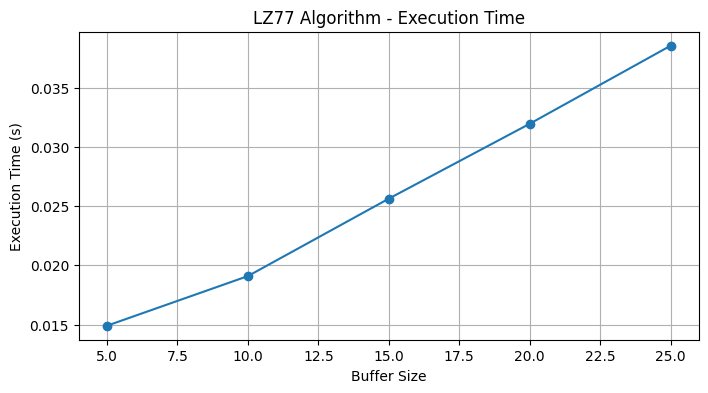

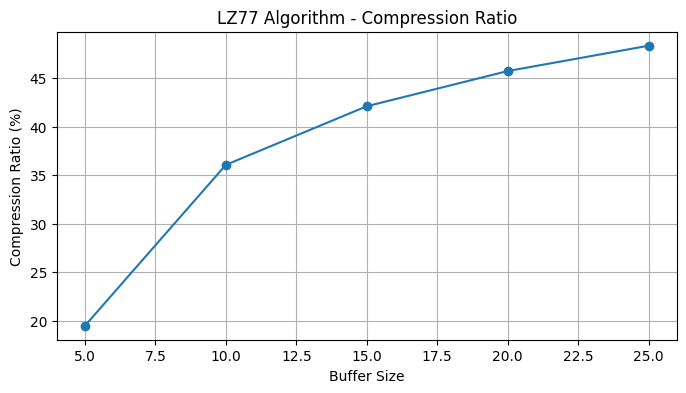

In [164]:
import matplotlib.pyplot as plt
import time


# Define the function to measure execution time
def measure_execution_time(text: str, algorithm: LZ77) -> float:
    start_time = time.time()
    algorithm.encode(text)
    end_time = time.time()
    execution_time = end_time - start_time
    return execution_time

# Define the function to measure compression ratio
def measure_compression_ratio(original_text: str, compressed_text: str) -> float:
    original_size = len(original_text)
    compressed_size = len(compressed_text)
    compression_ratio = (original_size - compressed_size) / original_size * 100
    return compression_ratio

# Define the text to be encoded
with open("huge_test.txt") as f:
    text = f.read()

# Define the buffer sizes to be tested
buffer_sizes = [5, 10, 15, 20, 25]

# Initialize lists to store the execution times and compression ratios
execution_times = []
compression_ratios = []

# Create an instance of the LZ77 algorithm for each buffer size and measure the execution time and compression ratio
for buffer_size in buffer_sizes:
    lz77 = LZ77(buffer_size)
    encoded_text = lz77.encode(text)
    execution_time = measure_execution_time(text, lz77)
    compression_ratio = measure_compression_ratio(text, encoded_text)
    execution_times.append(execution_time)
    compression_ratios.append(compression_ratio)

# Plot the execution times
plt.figure(figsize=(8, 4))
plt.plot(buffer_sizes, execution_times, marker='o')
plt.xlabel('Buffer Size')
plt.ylabel('Execution Time (s)')
plt.title('LZ77 Algorithm - Execution Time')
plt.grid(True)
plt.show()

# Plot the compression ratios
plt.figure(figsize=(8, 4))
plt.plot(buffer_sizes, compression_ratios, marker='o')
plt.xlabel('Buffer Size')
plt.ylabel('Compression Ratio (%)')
plt.title('LZ77 Algorithm - Compression Ratio')
plt.grid(True)
plt.show()


LZ77 is simple compresion algorithm which leaves details of implementation to programmer. It's power lies in compresing repetetive data such as network data transmision, images, storage optimizations.

# Алгоритм Deflate

In [ ]:
class Deflate:
    def __init__(self, buffer_size: int):
        pass

    def encode(self, text: str) -> str:
        pass

    def decode(self, code: str) -> str:
        pass